In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

数据加载和数据集的划分

In [2]:
def loadDataSet():
    x_data=pd.read_csv('D:/Python_resources/第19章用户行为数据/x_reSampler_mini.csv',header=0)
    y_data=pd.read_csv('D:/Python_resources/第19章用户行为数据/y_reSampler_mini.csv',header=0)
    y_data['label']= y_data['label'].astype('int')
    validation_size=0.2
    seed=7
    X_train,X_test,Y_train,Y_test =train_test_split(x_data,y_data,test_size=validation_size,random_state=seed)
    print(Y_train.shape)
    print(X_train.shape)
    return X_train,X_test,Y_train,Y_test
    

模型评价与模型ROC曲线和AUC值的求解

In [3]:
def testDraw(model,Y_test,X_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
    '''混淆矩阵图'''
    class_names = [0, 1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    '''混淆矩阵相关参数'''
    
    print( "Accuracy:", metrics.accuracy_score(Y_test, y_pred))
    print("Precision:", metrics.precision_score(Y_test, y_pred)) 
    print ("Recall:", metrics.recall_score(Y_test, y_pred))
    print("Log_loss：",metrics.log_loss(Y_test, y_prob)) 

    ''' Roc/Auc'''
    y_pred_proba = model.predict_proba(X_test)[::, 1]
    fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
    auc = metrics.roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
    plt.legend(loc=4)
    
    plt.show()

    #print(model.cv_results_) #k折交叉验证中每个数据集上的评价指标及模型训练的时间
    #print(model.best_score_) #评价指标最佳结果
    #print(model.best_params_) #模型最佳的调参结果


逻辑斯蒂分类模型的训练和结果评价

In [4]:
def trainLR(X_train,Y_train):
    penaltys = ['l1','l2']
    Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    param_grid  = dict(penalty = penaltys, C = Cs)
    base_estimator = LogisticRegression()
    lr_grid = GridSearchCV(base_estimator, param_grid, cv=5, scoring='recall')
    cur = datetime.datetime.now()
    print(cur)
    lr_grid.fit(X_train, Y_train)
    cur = datetime.datetime.now()
    print(cur)
    return lr_grid

(800, 1)
(800, 68)
2022-06-25 13:42:29.718062


d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

2022-06-25 13:42:30.855967


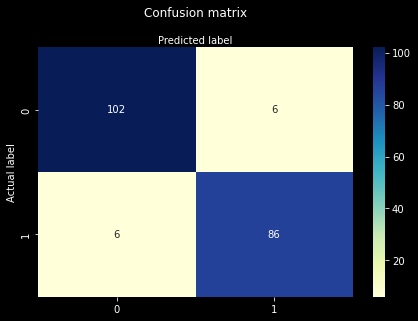

Accuracy: 0.94
Precision: 0.9347826086956522
Recall: 0.9347826086956522
Log_loss： 0.4495889299116071


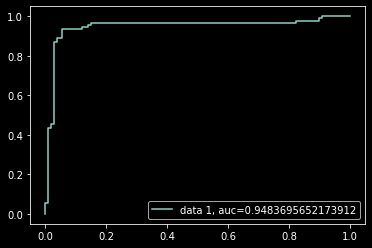

In [5]:
if __name__ =='__main__':
    X_train,X_test,Y_train,Y_test=loadDataSet()
    model=trainLR(X_train,Y_train)
    testDraw(model,Y_test,X_test)

最小近邻算法模型的分类结果和实验评价

In [6]:
def trainKnn(X_train,Y_train):
    #最小近邻算法模型的训练
    base_estimator = KNeighborsClassifier()
    param_grid = {'n_neighbors': [i for i in range(3, 12)]}
    knn_grid = GridSearchCV(base_estimator,param_grid, cv=5, scoring='recall')

    cur = datetime.datetime.now()
    print(cur)
    knn_grid.fit(X_train, Y_train)
    cur = datetime.datetime.now()
    print(cur)
    return knn_grid

(800, 1)
(800, 68)
2022-06-25 13:42:31.307451


d:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self

2022-06-25 13:42:31.918484


d:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


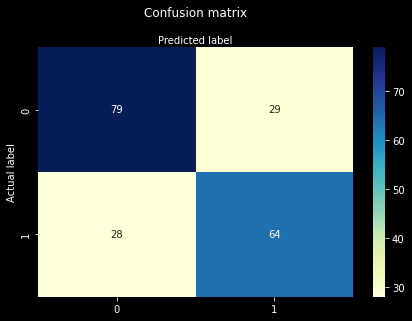

Accuracy: 0.715
Precision: 0.6881720430107527
Recall: 0.6956521739130435
Log_loss： 2.2719257350056616


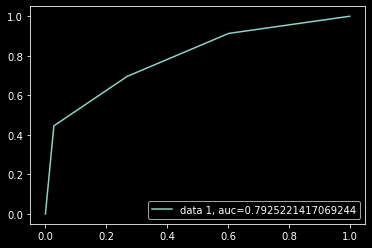

In [7]:
if __name__ =='__main__':
    X_train,X_test,Y_train,Y_test=loadDataSet()
    model=trainKnn(X_train,Y_train)
    testDraw(model,Y_test,X_test)

决策树分类模型的分类结果和实验评价

In [8]:
def trainTree(X_train,Y_train):   
 
    #2*3*90*18*4=270*18*4/3600
    param_grid  = {'criterion':['gini'],
                   'splitter':['best'],
                   'max_features':[None],
                   'max_depth':list(range(90,100)),
                   'min_samples_split':list(range(2,5)),
                   'min_samples_leaf':[2,3]
                   }

    base_estimator = DecisionTreeClassifier()
    model = GridSearchCV(base_estimator, param_grid, cv=5, scoring='recall')
    cur = datetime.datetime.now()
    print(cur)
    model.fit(X_train, Y_train)
    cur = datetime.datetime.now()
    print(cur)
    return model


(800, 1)
(800, 68)
2022-06-25 13:42:32.322566
2022-06-25 13:42:35.616663


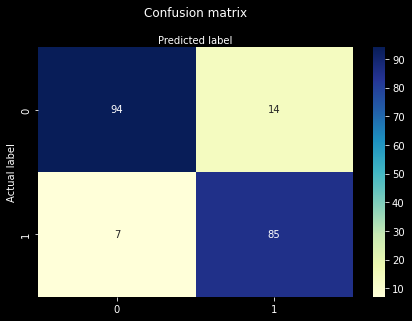

Accuracy: 0.895
Precision: 0.8585858585858586
Recall: 0.9239130434782609
Log_loss： 2.3293429023993806


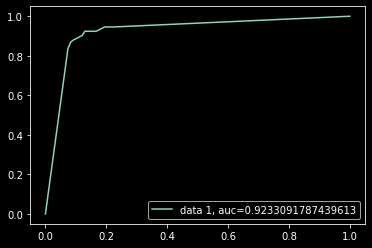

{'criterion': 'gini', 'max_depth': 93, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}


In [9]:
if __name__ =='__main__':
    X_train,X_test,Y_train,Y_test=loadDataSet()
    model=trainTree(X_train,Y_train)
    testDraw(model,Y_test,X_test)
    print(model.best_params_) #模型最佳的调参结果

支持向量机分类模型的分类结果和实验评价

In [10]:
def trainSVM(X_train,Y_train):
    svm_model = SVC(probability=True)
    param_grid=  {'kernel': ['linear'], 'C': [1, 10, 100, 1000]} #第一次：上下；第二次上：rbf；第三次：linear
    model = GridSearchCV(svm_model, param_grid, cv=5, scoring='recall')
    cur = datetime.datetime.now()
    print(cur)
    model.fit(X_train, Y_train)
    cur = datetime.datetime.now()
    print(cur)
    return model

(800, 1)
(800, 68)
2022-06-25 13:42:36.133813


d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

2022-06-25 13:51:16.888447


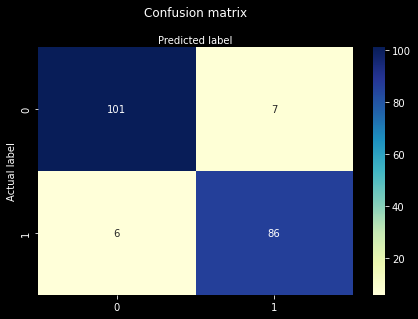

Accuracy: 0.935
Precision: 0.9247311827956989
Recall: 0.9347826086956522
Log_loss： 0.4650365884277477


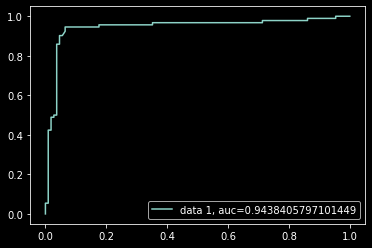

In [11]:
if __name__ =='__main__':
    X_train,X_test,Y_train,Y_test=loadDataSet()
    model=trainSVM(X_train,Y_train)
    testDraw(model,Y_test,X_test)

线性判别分析模型的训练和结果评价

In [12]:
def trainLDA(X_train,Y_train):
    Model = LinearDiscriminantAnalysis()
    cur = datetime.datetime.now()
    print(cur)
    Model.fit(X_train, Y_train)
    cur = datetime.datetime.now()
    print(cur)
    return Model

(800, 1)
(800, 68)
2022-06-25 13:51:17.219125
2022-06-25 13:51:17.230349


d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


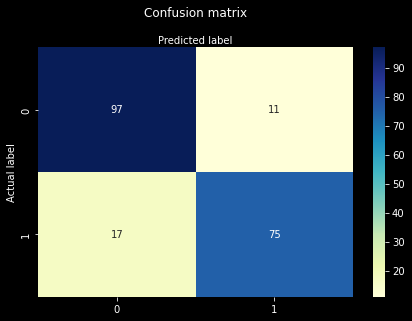

Accuracy: 0.86
Precision: 0.872093023255814
Recall: 0.8152173913043478
Log_loss： 0.43096960272103546


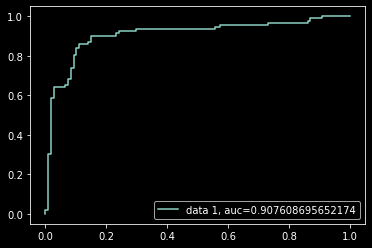

In [13]:
if __name__ =='__main__':
    X_train,X_test,Y_train,Y_test=loadDataSet()
    model=trainLDA(X_train,Y_train)
    testDraw(model,Y_test,X_test)

朴素贝叶斯算法的模型的训练和结果评价

In [14]:
def trainNB(X_train,Y_train):
    clf = GaussianNB()
    clf.fit(X_train, Y_train)
    return clf

(800, 1)
(800, 68)


d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


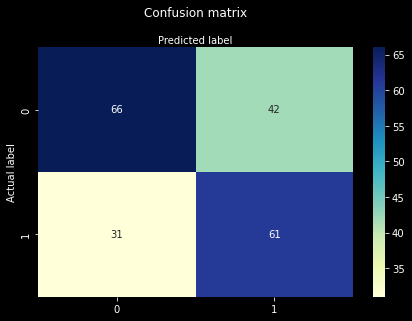

Accuracy: 0.635
Precision: 0.5922330097087378
Recall: 0.6630434782608695
Log_loss： 2.8733634352113877


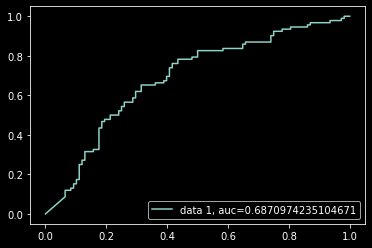

In [15]:
if __name__ =='__main__':
    X_train,X_test,Y_train,Y_test=loadDataSet()
    model=trainNB(X_train,Y_train)
    testDraw(model,Y_test,X_test)